# Guided Project: Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

John Hogue made the dataset available, and it can be downloaded from the UCI Machine Learning Repository here: [data](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

### Intial Observation

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


### Exploring Traffic Volume

We have read in the data set and done the very initial exploration. Now, we are going to plot a histogram to visualize the distribution of the traffic_volume column.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

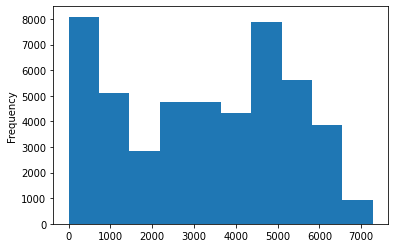

In [6]:
traffic_volume = traffic['traffic_volume']
traffic_volume.plot.hist()

In [7]:
traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

After analysis of the histogram and the series.describe method, we have the following initial findings:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

### Comparing Daytime and Nighttime

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

First, let's transform the date_time column into datetime and then let's isolate the daytime and the nighttime data.

In [8]:
traffic["date_time"]= pd.to_datetime(traffic["date_time"])

In [9]:
daytime_data = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
nighttime_data = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

In [10]:
daytime_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [11]:
nighttime_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


Now we're going to compare the traffic volume at night and during day by plotting a two histograms on a grid chart.

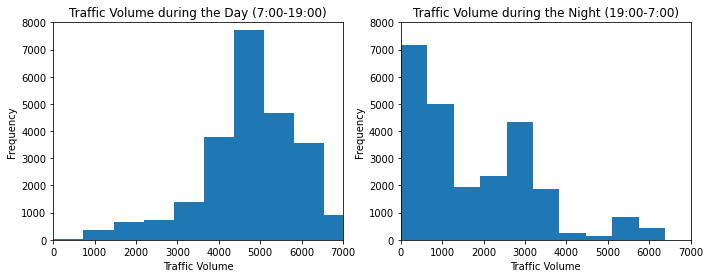

In [12]:
plt.figure()

plt.subplot(1, 2, 1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Traffic Volume during the Day (7:00-19:00)')
plt.xlabel('Traffic Volume') 
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.subplot(1, 2, 2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Traffic Volume during the Night (19:00-7:00)')
plt.xlabel('Traffic Volume') 
plt.ylabel('Frequency')
plt.xlim([0,7000])
plt.ylim([0,8000])

plt.subplots_adjust(right=1.6)
plt.show()

In [13]:
traffic_volume_day = daytime_data['traffic_volume']
traffic_volume_night = nighttime_data['traffic_volume']

In [14]:
traffic_volume_day.describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [15]:
traffic_volume_night.describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

### Exploration of Time (Month, Day of the Week, Time of Day) as the Indicator of Heavy Traffic

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

Let's start with generating the plot for the month, combining groupby method with data visualisation; the plot will show how the traffic volume changed each month on average.

In [16]:
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

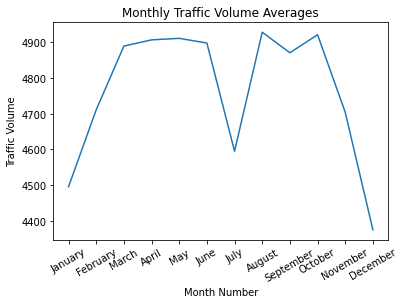

In [17]:
plt.plot(by_month['traffic_volume'])
plt.title('Monthly Traffic Volume Averages')
plt.xlabel('Month Number')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=30)
plt.show()

We'll now continue with building line plots for another time unit: day of the week.

In [18]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

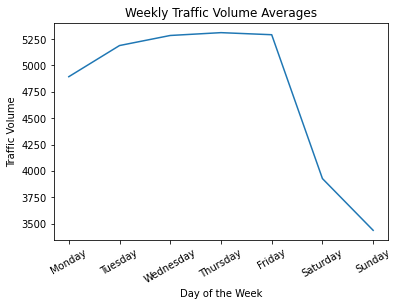

In [19]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Weekly Traffic Volume Averages')
plt.xlabel('Day of the Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=30)
plt.ylabel('Traffic Volume')
plt.show()

The initial observation of the traffic volume averages for each month as well as for the each weekday suggest the following:

- monthly traffic tends to be lower during the summer, between June and August as well as during the New Year/Christmas holiday in December/January
- weekly traffic tends to be significantly lower during the weekend in comparison to the business days

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [20]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour

bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


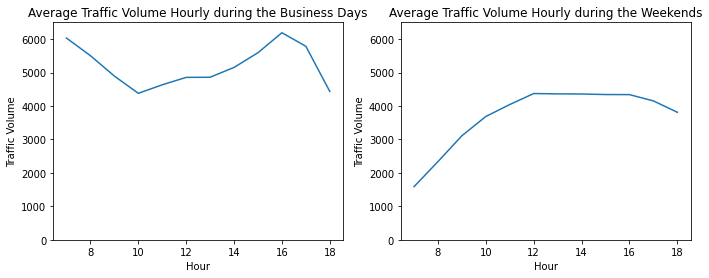

In [21]:
plt.figure()

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Average Traffic Volume Hourly during the Business Days')
plt.xlabel('Hour') 
plt.ylabel('Traffic Volume')
plt.ylim([0,6500])

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Average Traffic Volume Hourly during the Weekends')
plt.xlabel('Hour') 
plt.ylabel('Traffic Volume')
plt.ylim([0,6500])

plt.subplots_adjust(right=1.6)
plt.show()

With the average traffic volume being significantly higher on business days in comparision to weekends, it seems that the on business days the highest average traffic volume is around 7:00-8:00 and 16:00. 

### Exploration of Weather as the Indicator of Heavy Traffic

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [22]:
daytime_data.corr()[['traffic_volume']].sort_values(by='traffic_volume', ascending=False)

,traffic_volume
traffic_volume,1.000000
hour,0.172704
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
month,-0.022337
clouds_all,-0.032932
dayofweek,-0.416453


The weather column with the strongest correlation with traffic_volume is temperature column (with correlation of 0.128). Now let's plot a scatter plot for those two columns.

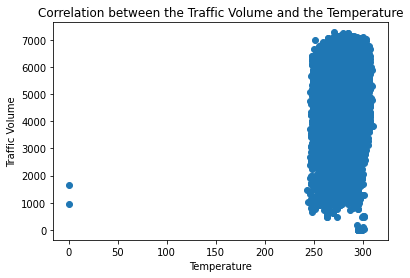

In [23]:
plt.scatter(daytime_data['temp'], daytime_data['traffic_volume'])
plt.title('Correlation between the Traffic Volume and the Temperature')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

It seems that there is no reliable indicator of heavy traffic among the numerical weather columns (the correlation is very weak, if any). 

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [24]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

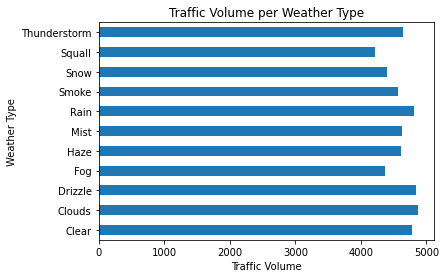

In [25]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Traffic Volume per Weather Type')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Type')
plt.show()

After the initial analysis of the weather_main column it seems that no weather type is a heavy traffic indicator.

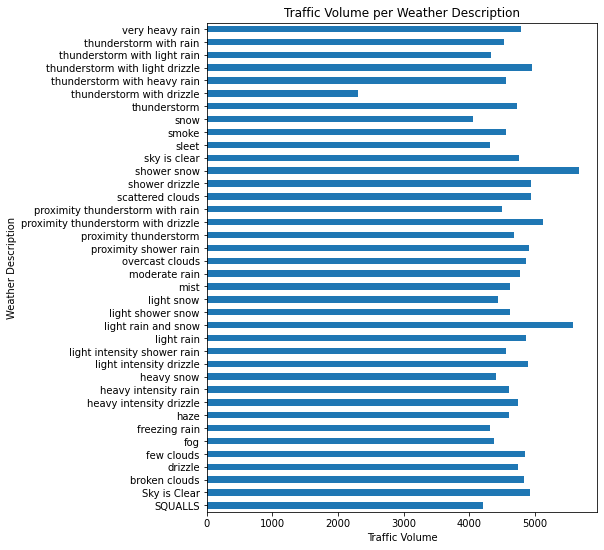

In [26]:
by_weather_description['traffic_volume'].plot.barh(figsize=(7,9))
plt.title('Traffic Volume per Weather Description')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

After the initial analysis of the weather_description column it seems that there are few weather types in this column that could be heavy traffic indicators, for example shower snow or light rain and snow. 

### Conclusion

In this guided project, our aim was to find a few indicators of heavy traffic on the I-94 Interstate highway. Generally speaking, there are two kinds of main indicators, i.e. time indicators and weather indicators.

It should be noted that given that traffic during the day (between 7:00 and 19:00) is significantly higher than during the night (from 19:00 to 7:00), the analysis included only the data for the day.

From among the time indicators:
- monthly traffic tends to be lower during the summer, between June and August as well as during the New Year/Christmas holiday in December/January
- weekly traffic tends to be significantly lower during the weekend in comparison to the business days
- on business days the highest average traffic volume is around 7:00-8:00 o'clock and 16:00 o'clock. 

From among the weather indicators:
- during the shower snow as well as light rain and snow, traffic volume is slightly higher in comparison with other types of weather.
